In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
start_date       = '2021-12-23'
month_begin_date = '2022-03-01'
end_date         = '2022-03-31'

## Setup Global Plotting Parameters

In [3]:
plt.figure()
plt.rcParams.update({'font.size': 16}) # must set at the top. It controls text size in charts and plots

<Figure size 432x288 with 0 Axes>

##  Find File Containing Initial Purchase and Allocations

In [4]:
# Get the data for the portfolio
_initial_purchase_file = "2022 Weighted Crypto Portfolio.csv"
_data_folder           = "./data/"

init_portfolio_path = os.path.join(_data_folder, _initial_purchase_file)
init_portfolio_path

'./data/2022 Weighted Crypto Portfolio.csv'

In [5]:
init_portfolio = pd.read_csv(init_portfolio_path).set_index('Coin', drop=True)
init_portfolio

,Amount,Net Cost,Fees,Investment,Cost Basis
Coin,,,,,
BTC,0.000307,15.00,0.07,14.93,48623.690000
ETH,0.003787,15.00,0.07,14.93,3941.660000
BNB,0.023982,12.70,0.01,12.69,529.003900
SOL,0.058000,10.50,0.05,10.45,179.330000
ADA,7.120000,9.75,0.05,9.70,1.361600
WLUNA,0.104000,9.80,0.05,9.75,93.220000
AVAX,0.080000,9.79,0.05,9.74,121.330000
DOT,0.352000,9.80,0.05,9.75,27.680000
DOGE,42.300000,7.60,0.04,7.56,0.177400


### Initial Allocation Percentages

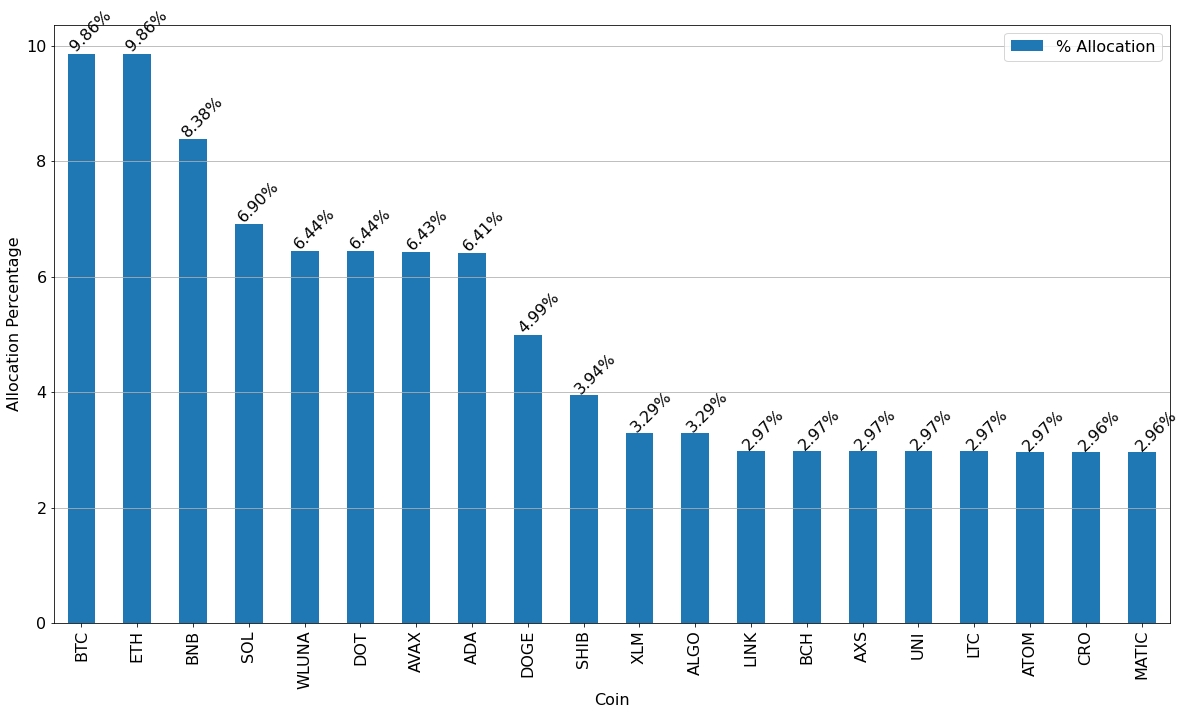

In [6]:
total = init_portfolio['Investment'].sum()

init_portfolio['% Allocation'] = (init_portfolio['Investment'] / total) * 100

#-- sort df by allocation size
init_portfolio = init_portfolio.sort_values(by='% Allocation', ascending=False)

ax = init_portfolio['% Allocation'].plot(kind='bar',
                                         grid=False,
                                         ylabel="Allocation Percentage",
                                         figsize=(20,11))

ax.grid(axis='y')
ax.legend()

#-- Annotate each bar in the chart
for p in ax.patches:
    _value:str = f"{p.get_height():.2f}%"
    ax.annotate(_value, (p.get_x() * 1.005, p.get_height() * 1.005),rotation=45)
    #ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

##  Open File With Historic Closing Data

In [7]:
_file           = "2022_portfolio_daily_close.csv"
_data_folder    = "./data"

historic_file_path = os.path.join(_data_folder, _file)

In [8]:
historic_df = pd.read_csv(historic_file_path).set_index('date')
historic_df

,BTC,ETH,BNB,SOL,ADA,WLUNA,AVAX,DOT,DOGE,SHIB,MATIC,CRO,LTC,UNI,LINK,ALGO,BCH,XLM,ATOM,AXS
date,,,,,,,,,,,,,,,,,,,,
2021-12-23,50842.20,4113.08,549.0,190.07,1.4743,94.42,121.37,29.17,0.1851,0.000039,2.6858,0.5951,163.74,18.18,22.19,1.4697,455.93,0.287776,28.38,107.47
2021-12-24,50851.38,4049.65,542.1,190.65,1.3935,95.77,114.93,28.17,0.1862,0.000036,2.4687,0.6280,161.35,17.50,21.47,1.5760,452.27,0.278628,26.87,104.62
2021-12-25,50428.31,4097.43,547.4,193.06,1.4542,98.39,114.86,28.86,0.1911,0.000038,2.6409,0.6434,158.00,17.49,22.12,1.5748,455.36,0.290047,29.79,109.27
2021-12-26,50801.79,4065.91,546.4,198.00,1.4549,99.63,115.07,31.34,0.1899,0.000038,2.8793,0.6233,155.96,18.67,22.99,1.6079,451.86,0.291987,32.17,107.62
2021-12-27,50717.77,4038.64,563.7,195.74,1.5164,90.88,113.96,30.97,0.1879,0.000039,2.7267,0.6234,155.78,19.11,23.02,1.6631,465.45,0.300288,29.68,107.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-27,46850.01,3296.29,430.5,107.09,1.1845,94.18,89.91,22.48,0.1447,0.000026,1.6949,0.4865,129.68,11.40,16.87,0.9498,376.78,0.229866,29.95,68.29
2022-03-28,47144.92,3334.47,430.2,105.84,1.1694,97.25,89.58,21.97,0.1425,0.000027,1.6575,0.4802,127.59,10.91,16.51,0.9075,368.10,0.229783,29.36,66.44
2022-03-29,47454.19,3401.71,434.2,111.64,1.1909,109.03,92.79,22.44,0.1444,0.000027,1.6760,0.4805,130.08,11.25,16.99,0.9232,372.34,0.233124,30.24,64.18


In [9]:
historic_df.dropna()
historic_df

,BTC,ETH,BNB,SOL,ADA,WLUNA,AVAX,DOT,DOGE,SHIB,MATIC,CRO,LTC,UNI,LINK,ALGO,BCH,XLM,ATOM,AXS
date,,,,,,,,,,,,,,,,,,,,
2021-12-23,50842.20,4113.08,549.0,190.07,1.4743,94.42,121.37,29.17,0.1851,0.000039,2.6858,0.5951,163.74,18.18,22.19,1.4697,455.93,0.287776,28.38,107.47
2021-12-24,50851.38,4049.65,542.1,190.65,1.3935,95.77,114.93,28.17,0.1862,0.000036,2.4687,0.6280,161.35,17.50,21.47,1.5760,452.27,0.278628,26.87,104.62
2021-12-25,50428.31,4097.43,547.4,193.06,1.4542,98.39,114.86,28.86,0.1911,0.000038,2.6409,0.6434,158.00,17.49,22.12,1.5748,455.36,0.290047,29.79,109.27
2021-12-26,50801.79,4065.91,546.4,198.00,1.4549,99.63,115.07,31.34,0.1899,0.000038,2.8793,0.6233,155.96,18.67,22.99,1.6079,451.86,0.291987,32.17,107.62
2021-12-27,50717.77,4038.64,563.7,195.74,1.5164,90.88,113.96,30.97,0.1879,0.000039,2.7267,0.6234,155.78,19.11,23.02,1.6631,465.45,0.300288,29.68,107.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-27,46850.01,3296.29,430.5,107.09,1.1845,94.18,89.91,22.48,0.1447,0.000026,1.6949,0.4865,129.68,11.40,16.87,0.9498,376.78,0.229866,29.95,68.29
2022-03-28,47144.92,3334.47,430.2,105.84,1.1694,97.25,89.58,21.97,0.1425,0.000027,1.6575,0.4802,127.59,10.91,16.51,0.9075,368.10,0.229783,29.36,66.44
2022-03-29,47454.19,3401.71,434.2,111.64,1.1909,109.03,92.79,22.44,0.1444,0.000027,1.6760,0.4805,130.08,11.25,16.99,0.9232,372.34,0.233124,30.24,64.18


## Plot of Normalized Price Data
This is a plot of the price movement in every coin, but normalized so they all fit in the same vertical range. It's just easier to see.

In [10]:
#normalize by doing (df - mean(df)) / std(df)
normalized_df = (historic_df - historic_df.mean()) / historic_df.std()

In [11]:
normalized_df

,BTC,ETH,BNB,SOL,ADA,WLUNA,AVAX,DOT,DOGE,SHIB,MATIC,CRO,LTC,UNI,LINK,ALGO,BCH,XLM,ATOM,AXS
date,,,,,,,,,,,,,,,,,,,,
2021-12-23,2.393205,2.516750,2.331316,2.312781,1.911262,1.072005,2.715151,1.891107,1.978212,2.536831,2.213851,2.191309,2.409720,1.837546,1.057760,1.332402,2.153624,1.872390,-0.573164,2.559572
2021-12-24,2.395687,2.370234,2.203602,2.330576,1.505333,1.150101,2.241365,1.650193,2.031954,2.004669,1.661704,2.698437,2.266654,1.630396,0.883020,1.673570,2.083817,1.615860,-0.906389,2.392848
2021-12-25,2.281292,2.480600,2.301701,2.404520,1.810282,1.301666,2.236215,1.816424,2.271353,2.345253,2.099658,2.935815,2.066121,1.627350,1.040772,1.669718,2.142752,1.936074,-0.262006,2.664871
2021-12-26,2.382279,2.407793,2.283192,2.556090,1.813799,1.373399,2.251665,2.413892,2.212725,2.451685,2.705976,2.625990,1.944005,1.986816,1.251917,1.775952,2.075997,1.990476,0.263210,2.568347
2021-12-27,2.359560,2.344802,2.603404,2.486749,2.122768,0.867218,2.170003,2.324754,2.115011,2.621977,2.317871,2.627531,1.933230,2.120854,1.259198,1.953115,2.335199,2.223254,-0.286281,2.535002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-27,1.313739,0.630053,0.137960,-0.233225,0.455341,1.058121,0.400663,0.279388,0.004392,-0.255954,-0.306288,0.517326,0.370869,-0.227859,-0.233380,-0.336204,0.643998,0.248468,-0.226698,0.267561
2022-03-28,1.393481,0.718245,0.132407,-0.271577,0.379481,1.235718,0.376385,0.156522,-0.103093,-0.053732,-0.401407,0.420216,0.245761,-0.377128,-0.320750,-0.471965,0.478445,0.246141,-0.356898,0.159337
2022-03-29,1.477106,0.873562,0.206445,-0.093621,0.487494,1.917182,0.612542,0.269751,-0.010265,0.122945,-0.354356,0.424841,0.394814,-0.273553,-0.204256,-0.421576,0.559314,0.339829,-0.162701,0.027128


<AxesSubplot:xlabel='date'>

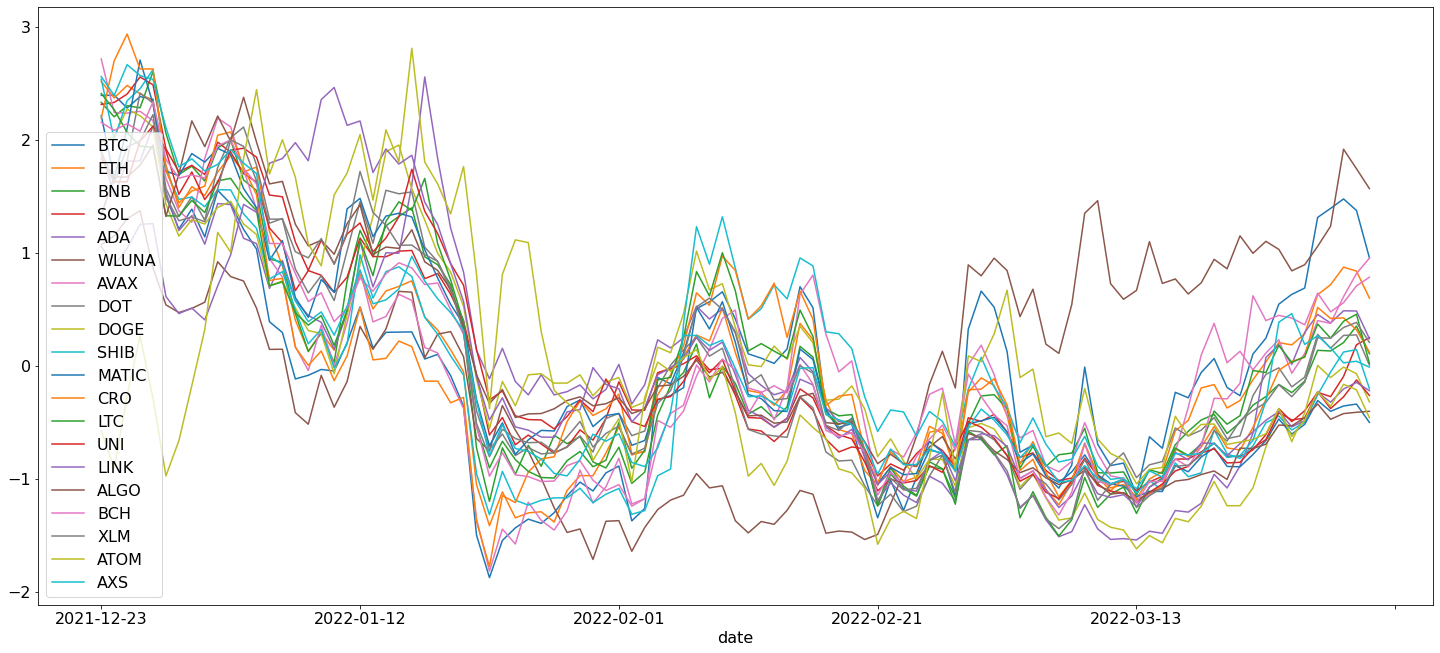

In [12]:
normalized_df.plot(figsize=(25,11),)

### Tracking Investment

In [13]:
init_investments = init_portfolio['Amount']
init_investments

Coin
BTC           0.000307
ETH           0.003787
BNB           0.023982
SOL           0.058000
WLUNA         0.104000
DOT           0.352000
AVAX          0.080000
ADA           7.120000
DOGE         42.300000
SHIB     164383.000000
XLM          16.000000
ALGO          3.000000
LINK          0.210000
BCH           0.010157
AXS           0.043000
UNI           0.259222
LTC           0.028594
ATOM          0.100000
CRO           7.800000
MATIC         1.700000
Name: Amount, dtype: float64

In [14]:
init_portfolio.columns

Index(['Amount', 'Net Cost', 'Fees', 'Investment', 'Cost Basis',
       '% Allocation'],
      dtype='object')

In [15]:
value_df = historic_df.multiply(init_investments, axis=1)
value_df

,ADA,ALGO,ATOM,AVAX,AXS,BCH,BNB,BTC,CRO,DOGE,DOT,ETH,LINK,LTC,MATIC,SHIB,SOL,UNI,WLUNA,XLM
date,,,,,,,,,,,,,,,,,,,,
2021-12-23,10.497016,4.4091,2.838,9.7096,4.62121,4.630662,13.166118,15.606013,4.64178,7.82973,10.26784,15.574465,4.6599,4.681941,4.56586,6.361622,11.02406,4.712656,9.81968,4.604416
2021-12-24,9.921720,4.7280,2.687,9.1944,4.49866,4.593489,13.000642,15.608831,4.89840,7.87626,9.91584,15.334283,4.5087,4.613602,4.19679,5.950665,11.05770,4.536385,9.96008,4.458048
2021-12-25,10.353904,4.7244,2.979,9.1888,4.69861,4.624873,13.127747,15.478970,5.01852,8.08353,10.15872,15.515206,4.6452,4.517812,4.48953,6.213677,11.19748,4.533793,10.23256,4.640752
2021-12-26,10.358888,4.8237,3.217,9.2056,4.62766,4.589325,13.103765,15.593609,4.86174,8.03277,11.03168,15.395853,4.8279,4.459481,4.89481,6.295869,11.48400,4.839675,10.36152,4.671792
2021-12-27,10.796768,4.9893,2.968,9.1168,4.60315,4.727352,13.518653,15.567820,4.86252,7.94817,10.90144,15.292593,4.8342,4.454334,4.63539,6.427375,11.35292,4.953732,9.45152,4.804608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-27,8.433640,2.8494,2.995,7.1928,2.93647,3.826774,10.324251,14.380611,3.79470,6.12081,7.91296,12.481633,3.5427,3.708038,2.88133,4.204917,6.21122,2.955131,9.79472,3.677856
2022-03-28,8.326128,2.7225,2.936,7.1664,2.85692,3.738615,10.317056,14.471133,3.74556,6.02775,7.73344,12.626204,3.4671,3.648277,2.81775,4.361081,6.13872,2.828112,10.11400,3.676528
2022-03-29,8.479208,2.7696,3.024,7.4232,2.75974,3.781679,10.412984,14.566064,3.74790,6.10812,7.89888,12.880813,3.5679,3.719475,2.84920,4.497519,6.47512,2.916247,11.33912,3.729984


In [16]:
value_df['total'] = value_df.sum(axis=1)

In [17]:
value_df

,ADA,ALGO,ATOM,AVAX,AXS,BCH,BNB,BTC,CRO,DOGE,...,ETH,LINK,LTC,MATIC,SHIB,SOL,UNI,WLUNA,XLM,total
date,,,,,,,,,,,,,,,,,,,,,
2021-12-23,10.497016,4.4091,2.838,9.7096,4.62121,4.630662,13.166118,15.606013,4.64178,7.82973,...,15.574465,4.6599,4.681941,4.56586,6.361622,11.02406,4.712656,9.81968,4.604416,154.221669
2021-12-24,9.921720,4.7280,2.687,9.1944,4.49866,4.593489,13.000642,15.608831,4.89840,7.87626,...,15.334283,4.5087,4.613602,4.19679,5.950665,11.05770,4.536385,9.96008,4.458048,151.539495
2021-12-25,10.353904,4.7244,2.979,9.1888,4.69861,4.624873,13.127747,15.478970,5.01852,8.08353,...,15.515206,4.6452,4.517812,4.48953,6.213677,11.19748,4.533793,10.23256,4.640752,154.423084
2021-12-26,10.358888,4.8237,3.217,9.2056,4.62766,4.589325,13.103765,15.593609,4.86174,8.03277,...,15.395853,4.8279,4.459481,4.89481,6.295869,11.48400,4.839675,10.36152,4.671792,156.676637
2021-12-27,10.796768,4.9893,2.968,9.1168,4.60315,4.727352,13.518653,15.567820,4.86252,7.94817,...,15.292593,4.8342,4.454334,4.63539,6.427375,11.35292,4.953732,9.45152,4.804608,156.206646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-27,8.433640,2.8494,2.995,7.1928,2.93647,3.826774,10.324251,14.380611,3.79470,6.12081,...,12.481633,3.5427,3.708038,2.88133,4.204917,6.21122,2.955131,9.79472,3.677856,120.224959
2022-03-28,8.326128,2.7225,2.936,7.1664,2.85692,3.738615,10.317056,14.471133,3.74556,6.02775,...,12.626204,3.4671,3.648277,2.81775,4.361081,6.13872,2.828112,10.11400,3.676528,119.719274
2022-03-29,8.479208,2.7696,3.024,7.4232,2.75974,3.781679,10.412984,14.566064,3.74790,6.10812,...,12.880813,3.5679,3.719475,2.84920,4.497519,6.47512,2.916247,11.33912,3.729984,122.946753


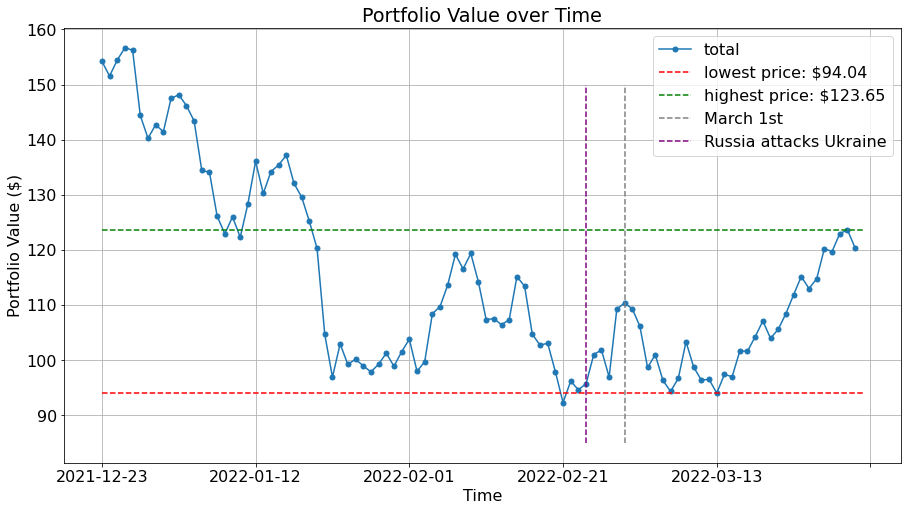

In [18]:
ax = value_df['total'].plot(figsize=(15,8), 
                            ylabel='Portfolio Value ($)', 
                            xlabel='Time',
                            marker='.', 
                            markersize=10,
                            title="Portfolio Value over Time",
                            grid=True)

#ax.grid('on', which='minor', axis='y' )
#ax.grid('off', which='major', axis='y',)# linestyle='-', linewidth=0.25,)
#ax.hlines(value_df['total'].min(), ax.get_xticks()[0], ax.get_xticks()[-1], linestyle='--', color='red')
#ax.hlines(114, ax.get_xticks()[0], ax.get_xticks()[-1], linestyle='--', color='green')

#------- Creating Horizontal and Vertical Lines For Important Dates
xmin = 0
xmax = len(value_df)
ymin = 85
ymax = 150

highest_price = value_df[month_begin_date:end_date]['total'].max()
lowest_price  = value_df[month_begin_date:end_date]['total'].min()
ax.hlines(lowest_price, xmin=xmin, xmax=xmax, linestyle='--', color='red'   , label=f"lowest price: ${lowest_price:.2f}")
ax.hlines(highest_price, xmin=xmin, xmax=xmax, linestyle='--', color='green', label=f"highest price: ${highest_price:.2f}")

#ax.vlines('10', ax.get_yticks().min(), ax.get_yticks().max(), linestyle='--', color='white')
#ax.vlines(40, ax.get_yticks().min(), ax.get_yticks().max(), linestyle='--', color='gray', label="February 1st")
#ax.vlines(63, ax.get_yticks().min(), ax.get_yticks().max(), linestyle='--', color='purple', label="Russia attacks Ukraine")

ax.vlines(68, ymin=ymin, ymax=ymax, linestyle='--', color='gray', label="March 1st")
ax.vlines(63, ymin=ymin, ymax=ymax, linestyle='--', color='purple', label="Russia attacks Ukraine")


#------- Makes Line lables show up
ax.legend()

#ax.plot(pad_inches=0)

## Plot Changes in Allocation Percentages
In this plot, I will show a comparison between the initial allocation vs the current allocation percentages.

In [19]:
# Compute new allocation percentages
current_values = value_df[end_date:].drop('total', axis=1).transpose()[end_date]
current_allocation = ((current_values / current_values.sum()) * 100)
current_allocation

ADA       6.751908
ALGO      2.316142
ATOM      2.400448
AVAX      6.473402
AXS       2.269038
BCH       3.240711
BNB       8.543502
BTC      11.607668
CRO       2.985393
DOGE      4.852087
DOT       6.242162
ETH      10.325758
LINK      2.953050
LTC       2.941926
MATIC     2.285933
SHIB      3.528125
SOL       5.918791
UNI       2.430862
WLUNA     8.897440
XLM       3.035655
Name: 2022-03-31, dtype: float64

In [20]:
index = current_allocation.index
index

Index(['ADA', 'ALGO', 'ATOM', 'AVAX', 'AXS', 'BCH', 'BNB', 'BTC', 'CRO',
       'DOGE', 'DOT', 'ETH', 'LINK', 'LTC', 'MATIC', 'SHIB', 'SOL', 'UNI',
       'WLUNA', 'XLM'],
      dtype='object')

In [21]:
comparison_df = pd.DataFrame({'Orginal % Allocation':init_portfolio['% Allocation'],
                              'Current % Allocation':current_allocation}, index=index)

In [22]:
#-- sort df by current allocation
comparison_df = comparison_df.sort_values(by='Current % Allocation', ascending=False)

In [23]:
comparison_df

,Orginal % Allocation,Current % Allocation
BTC,9.862597,11.607668
ETH,9.862597,10.325758
WLUNA,6.440745,8.897440
BNB,8.382878,8.543502
ADA,6.407716,6.751908
AVAX,6.434139,6.473402
DOT,6.440745,6.242162
SOL,6.903158,5.918791
DOGE,4.994055,4.852087
SHIB,3.943718,3.528125


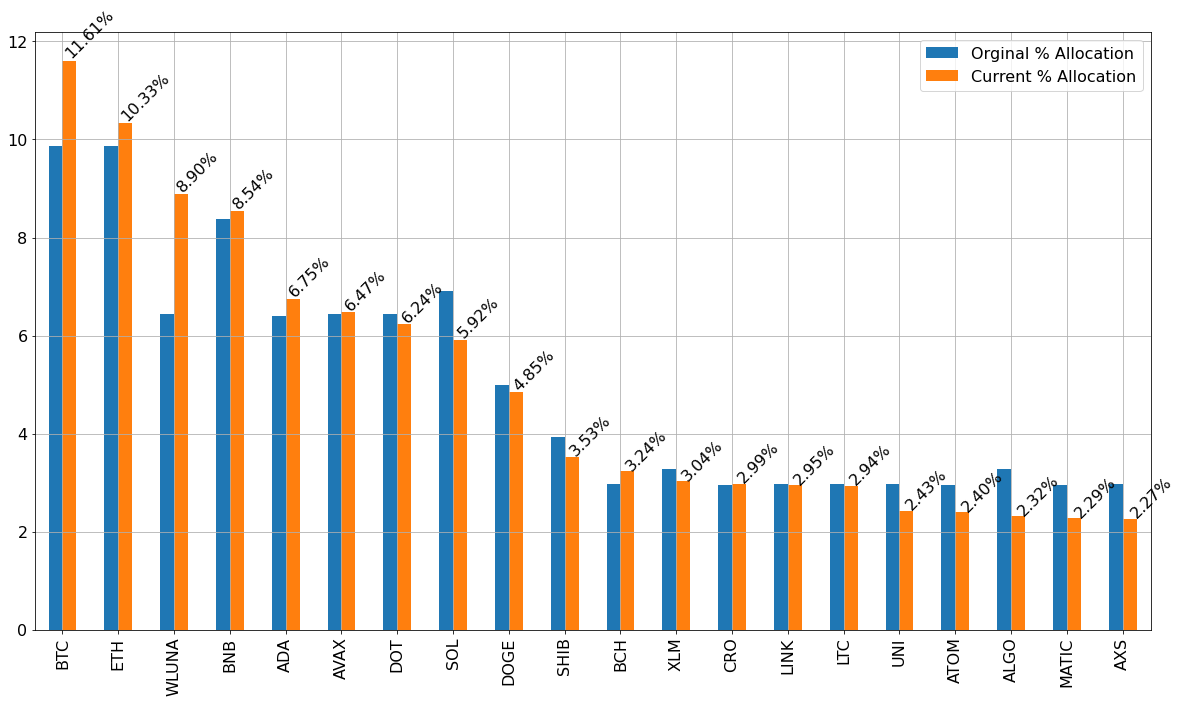

In [24]:
ax = comparison_df.plot(kind = 'bar',
                        y    = ["Orginal % Allocation", "Current % Allocation"],
                        figsize = (20,11),
                        grid=True,
                       )

#ax.grid(axis='y')
ax.legend()

#-- Annotate each bar in the chart
for p in ax.patches:
    if p.xy[0]%1 != 0:  #print(p) to understand what p.xy is
        continue   #cheat way to ignore the initial allocation bars and only plot new ones (it is very messy to put all of them)
    _value:str = f"{p.get_height():.2f}%"
    ax.annotate(_value, (p.get_x() * 1.005, p.get_height() * 1.005),rotation=45)
    #ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Monthly Performance

In [25]:
_month_init = value_df['total'].loc[month_begin_date]
_month_end  = value_df['total'].loc[end_date]
_percent_change = ((_month_end - _month_init) / _month_init) * 100

_monthly_min = value_df['total'][month_begin_date:end_date].min()
_monthly_max = value_df['total'][month_begin_date:end_date].max()

print(f"Initial Value : ${_month_init:.2f}")
print(f"Final Value   : ${_month_end:.2f}")
print(f"Value Change  : ${_month_end - _month_init:.2f}\n")

print(f"Lowest Value  : ${_monthly_min:.2f}")
print(f"Highest Value : ${_monthly_max:.2f}\n")

print(f"Monthly Gain/Loss (%): {_percent_change:.2f}")

Initial Value : $110.37
Final Value   : $120.39
Value Change  : $10.02

Lowest Value  : $94.04
Highest Value : $123.65

Monthly Gain/Loss (%): 9.08


## Total Performance
Performance since portfolio inception.

In [26]:
_total_init = value_df['total'].loc[start_date]
_total_end  = value_df['total'].loc[end_date]
_total_percent_change = ((_total_end - _total_init) / _total_init) * 100

_total_min = value_df['total'].min()
_total_max = value_df['total'].max()

print(f"Initial Value : ${_total_init:.2f}")
print(f"Final Value   : ${_total_end:.2f}")
print(f"Value Change  : ${_total_end - _total_init:.2f}\n")

print(f"Lowest Value  : ${_total_min:.2f}")
print(f"Highest Value : ${_total_max:.2f}\n")

print(f"Monthly Gain/Loss (%): {_total_percent_change:.2f}")

Initial Value : $154.22
Final Value   : $120.39
Value Change  : $-33.83

Lowest Value  : $92.34
Highest Value : $156.68

Monthly Gain/Loss (%): -21.93
